In [1]:
import pandas as pd
from database_handler import execute_query,create_connection,return_data_as_df
from lookups import InputTypes
pd.reset_option('display')

db_session = create_connection()
query = """ SELECT * FROM dw_reporting.agg_quarterly_gdp_vs_presidentials_speech_sentiments
 """

df = return_data_as_df(query,InputTypes.SQL,db_session)

C:\Users\user\AppData\Local\Temp\ipykernel_12460\2287388311.py:4: FutureWarning: column_space is deprecated and will be removed in a future version. Use df.to_string(col_space=...) instead.
  pd.reset_option('display')
c:\Users\user\OneDrive\Documents\SE_Factory\FSD\Final_Project\usa_recession_analysis\database_handler.py:64: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return_dataframe = pd.read_sql_query(con= db_session, sql= file_executor)


In [27]:
df.head(10)

,gdp,pce,gpdi,netexp,gcec,impgs,average_negative,average_neutral,average_positive,average_compound,gdp_diff
date,,,,,,,,,,,
2007-01-01,16611.690,28716.4,2664.295,-739.273,3299.115,2317.264,0.17,0.57,0.26,0.9996,NaN
2007-04-01,16713.314,29036.2,2699.217,-745.806,3329.139,2368.569,0.09,0.66,0.26,0.9998,101.624
2008-01-01,16843.003,30013.4,2563.701,-771.248,3378.654,2584.568,0.20,0.56,0.24,0.0002,129.689
2008-07-01,16854.295,30477.2,2498.242,-787.354,3435.100,2709.569,0.13,0.63,0.24,0.9998,11.292
2008-10-01,16485.350,29720.8,2307.915,-628.474,3458.839,2328.779,0.12,0.63,0.25,0.9969,-368.945
2009-01-01,16298.262,29444.9,2014.878,-420.992,3498.103,1932.761,0.13,0.59,0.28,0.9995,-187.088
2009-04-01,16269.145,29416.5,1863.650,-358.368,3549.027,1879.461,0.10,0.62,0.28,0.9998,-29.117
2009-07-01,16326.281,29818.2,1841.416,-423.998,3558.540,2018.722,0.14,0.65,0.21,0.9998,57.136
2009-10-01,16502.754,30015.0,1998.710,-473.254,3565.188,2176.763,0.20,0.56,0.25,0.9982,176.473


In [2]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt



# Set the 'date' column as the index
df['date'] = pd.to_datetime(df['date'])
print(df.dtypes)
df.set_index('date', inplace=True)

# Select relevant columns
columns_to_use = ['gdp', 'pce', 'gpdi', 'netexp', 'gcec', 'impgs','average_negative','average_neutral','average_positive','average_compound']
df = df[columns_to_use]



date                                datetime64[ns]
gdp                                        float64
pce                                        float64
gpdi                                       float64
netexp                                     float64
gcec                                       float64
impgs                                      float64
number_of_speeches_per_president            object
average_negative                           float64
average_neutral                            float64
average_positive                           float64
average_compound                           float64
dtype: object


### differencing

In [3]:
# You can use the adfuller function from statsmodels for the ADF test
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['gdp'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 0.419467946529106
p-value: 0.9822085540872784


In [4]:
df['gdp_diff'] = df['gdp'].diff()

In [5]:
result_diff = adfuller(df['gdp_diff'].dropna())
print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])

ADF Statistic: -8.53865064520046
p-value: 9.92029588941715e-14


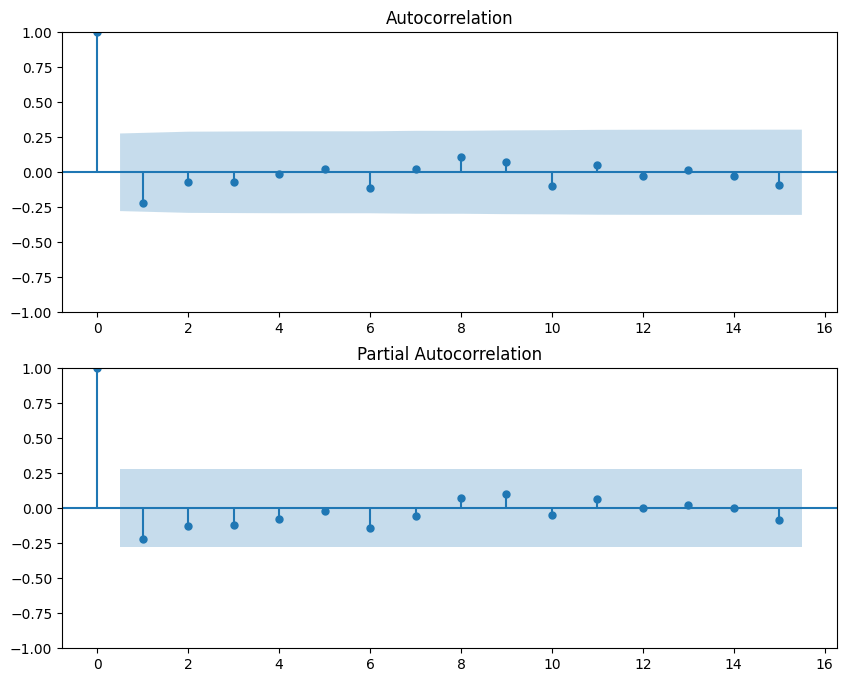

In [6]:
# Example of ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(df['gdp_diff'].dropna(), lags=15, ax=ax1)
plot_pacf(df['gdp_diff'].dropna(), lags=15, ax=ax2)

plt.show()


In [7]:
# # Check for missing values and fill or drop them if necessary
# df = df.dropna()

# Fit ARIMA model
#314

model = ARIMA(df['gdp'], order=(4, 1, 2))  # You may need to experiment with order values
result = model.fit()

c:\Users\user\anaconda3\envs\sefactory_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\envs\sefactory_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\envs\sefactory_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\anaconda3\envs\sefactory_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros a

In [8]:
# Make predictions for future periods
future_periods = 40 # Adjust as needed
forecast = result.get_forecast(steps=future_periods)


c:\Users\user\anaconda3\envs\sefactory_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\user\anaconda3\envs\sefactory_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [9]:
# Get the predicted values and confidence intervals
predicted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

In [10]:
predicted_values

51    22205.932334
52    22308.021636
53    22416.702207
54    22524.427469
55    22631.901770
56    22739.392796
57    22846.852529
58    22954.268571
59    23061.648687
60    23168.988163
61    23276.291697
62    23383.554490
63    23490.781380
64    23597.967561
65    23705.117866
66    23812.227489
67    23919.301263
68    24026.334383
69    24133.331681
70    24240.288352
71    24347.209229
72    24454.089507
73    24560.934017
74    24667.737955
75    24774.506153
76    24881.233806
77    24987.925746
78    25094.577169
79    25201.192906
80    25307.768152
81    25414.307741
82    25520.806866
83    25627.270360
84    25733.693417
85    25840.080871
86    25946.427916
87    26052.739384
88    26159.010471
89    26265.246007
90    26371.441189
Name: predicted_mean, dtype: float64

In [11]:
confidence_intervals_df = pd.DataFrame(confidence_intervals)

In [12]:
confidence_intervals_df['increment'] = range(1, len(confidence_intervals) + 1)

In [13]:
confidence_intervals_df.head()

,lower gdp,upper gdp,increment
51,21495.266335,22916.598334,1
52,21335.744996,23280.298276,2
53,21248.753618,23584.650797,3
54,21182.297276,23866.557662,4
55,21131.232588,24132.570952,5


In [14]:
initial_date = pd.to_datetime("2023-01-01")

In [15]:
confidence_intervals_df['date'] = initial_date + pd.DateOffset(months=3) * confidence_intervals_df['increment']


In [16]:
confidence_intervals_df.head()

,lower gdp,upper gdp,increment,date
51,21495.266335,22916.598334,1,2023-04-01
52,21335.744996,23280.298276,2,2023-07-01
53,21248.753618,23584.650797,3,2023-10-01
54,21182.297276,23866.557662,4,2024-01-01
55,21131.232588,24132.570952,5,2024-04-01


In [17]:
predicted_values_df = pd.DataFrame(predicted_values)
predicted_values_df.head()

,predicted_mean
51,22205.932334
52,22308.021636
53,22416.702207
54,22524.427469
55,22631.901770


In [18]:
predicted_values_df['increment'] = range(1, len(predicted_values_df) + 1)

In [19]:
predicted_values_df['date'] = initial_date + pd.DateOffset(months=3) * predicted_values_df['increment']


In [20]:
predicted_values_df.head()

,predicted_mean,increment,date
51,22205.932334,1,2023-04-01
52,22308.021636,2,2023-07-01
53,22416.702207,3,2023-10-01
54,22524.427469,4,2024-01-01
55,22631.901770,5,2024-04-01


In [21]:
future_dates = pd.date_range(start=pd.to_datetime("2023-01-01"), periods=30 + 1, freq='M')[1:]
future_dates = pd.to_datetime("2023-01-01") + pd.DateOffset(months=3) * predicted_values_df['increment']

In [22]:
future_dates

51   2023-04-01
52   2023-07-01
53   2023-10-01
54   2024-01-01
55   2024-04-01
56   2024-07-01
57   2024-10-01
58   2025-01-01
59   2025-04-01
60   2025-07-01
61   2025-10-01
62   2026-01-01
63   2026-04-01
64   2026-07-01
65   2026-10-01
66   2027-01-01
67   2027-04-01
68   2027-07-01
69   2027-10-01
70   2028-01-01
71   2028-04-01
72   2028-07-01
73   2028-10-01
74   2029-01-01
75   2029-04-01
76   2029-07-01
77   2029-10-01
78   2030-01-01
79   2030-04-01
80   2030-07-01
81   2030-10-01
82   2031-01-01
83   2031-04-01
84   2031-07-01
85   2031-10-01
86   2032-01-01
87   2032-04-01
88   2032-07-01
89   2032-10-01
90   2033-01-01
Name: increment, dtype: datetime64[ns]

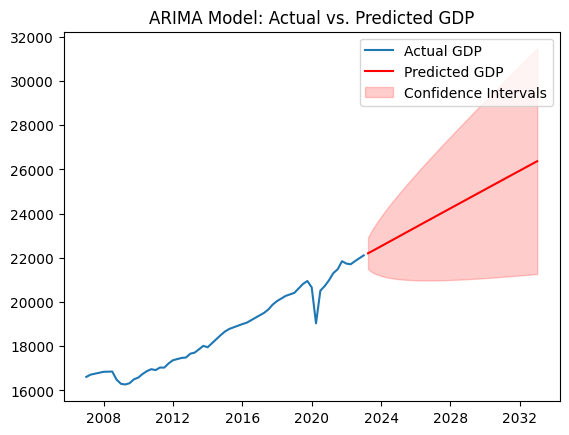

In [23]:
# Plot the actual values
plt.plot(df['gdp'], label='Actual GDP')

# Plot the predicted values
plt.plot(future_dates, predicted_values, label='Predicted GDP', color='red')

# Plot confidence intervals if needed
plt.fill_between(future_dates, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='red', alpha=0.2, label='Confidence Intervals')

# Display the plot
plt.legend()
plt.title('ARIMA Model: Actual vs. Predicted GDP')
plt.show()